In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # layer1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.batchnorm1 = nn.BatchNorm2d((32))
        self.relu1 = nn.ReLU(inplace=True)
        self.pooling1 = nn.MaxPool2d((2, 2))
        # layer2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.batchnorm2 = nn.BatchNorm2d((64))
        self.relu2 = nn.ReLU(inplace=True)
        self.pooling2 = nn.MaxPool2d((2, 2))
        # layer3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
        self.batchnorm3 = nn.BatchNorm2d((128))
        self.relu3 = nn.ReLU(inplace=True)
        self.pooling3 = nn.MaxPool2d((2, 2))
        # layer4
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
        self.batchnorm4 = nn.BatchNorm2d((256))
        self.relu4 = nn.ReLU(inplace=True)
        self.pooling4 = nn.MaxPool2d((2, 2))
        # classifier
        self.flatten = nn.Flatten()
        # 六个类别
        self.linear = nn.Linear(in_features=16384, out_features=6)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, input):
        # layer1
        self.conv1_out = self.conv1(input)
        self.batchnorm1_out = self.batchnorm1(self.conv1_out)
        self.relu1_out = self.relu1(self.batchnorm1_out)
        self.pooling1_out = self.pooling1(self.relu1_out)
        # layer2
        self.conv2_out = self.conv2(self.pooling1_out)
        self.batchnorm2_out = self.batchnorm2(self.conv2_out)
        self.relu2_out = self.relu2(self.batchnorm2_out)
        self.pooling2_out = self.pooling2(self.relu2_out)
        # layer3
        self.conv3_out = self.conv3(self.pooling2_out)
        self.batchnorm3_out = self.batchnorm3(self.conv3_out)
        self.relu3_out = self.relu3(self.batchnorm3_out)
        self.pooling3_out = self.pooling3(self.relu3_out)
        # layer4
        self.conv4_out = self.conv4(self.pooling3_out)
        self.batchnorm4_out = self.batchnorm4(self.conv4_out)
        self.relu4_out = self.relu4(self.batchnorm4_out)
        # classifier
        self.flatten_out = self.flatten(self.relu4_out)
        self.linear_out = self.linear(self.flatten_out)
        self.sigmoid_out = self.sigmoid(self.linear_out)
        
        output = self.sigmoid_out
        
        return output

In [3]:
mymodel = MyModel()

In [4]:
# 模型可视化
from torchsummary import summary
summary(model=mymodel, input_size=[(3, 100, 100)], batch_size=1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 32, 98, 98]             896
       BatchNorm2d-2            [1, 32, 98, 98]              64
              ReLU-3            [1, 32, 98, 98]               0
         MaxPool2d-4            [1, 32, 49, 49]               0
            Conv2d-5            [1, 64, 47, 47]          18,496
       BatchNorm2d-6            [1, 64, 47, 47]             128
              ReLU-7            [1, 64, 47, 47]               0
         MaxPool2d-8            [1, 64, 23, 23]               0
            Conv2d-9           [1, 128, 21, 21]          73,856
      BatchNorm2d-10           [1, 128, 21, 21]             256
             ReLU-11           [1, 128, 21, 21]               0
        MaxPool2d-12           [1, 128, 10, 10]               0
           Conv2d-13             [1, 256, 8, 8]         295,168
      BatchNorm2d-14             [1, 25

In [5]:
# 数据集
# 使用torchvisiond的datasets.ImageFolder类来导入本地的数据集
# 使用transform来进行数据增强
train_dataset = torchvision.datasets.ImageFolder(
    root='F:/BaiduNetdiskDownload/数据集/新鲜水果/Datasets/train/',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((100, 100)),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(20),
        torchvision.transforms.ToTensor(),
    ]))

val_dataset = torchvision.datasets.ImageFolder(
    root='F:/BaiduNetdiskDownload/数据集/新鲜水果/Datasets/test/',
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Resize((100, 100)),
        torchvision.transforms.ToTensor(),
    ]))

In [6]:
# 数据导入器
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=True)

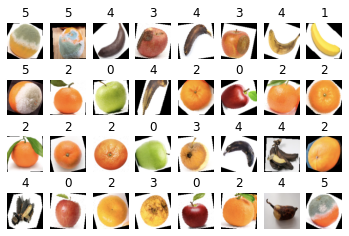

In [7]:
# 可视化
train_iter = iter(train_dataloader) # 将train_dataloader变成迭代器
images, labels = train_iter.__next__()
for i in range(32):
    image = images[i]
    label = labels[i]
    image = np.transpose(image, (1, 2, 0))
    plt.subplot(4, 8, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label.item())
plt.show()
plt.close()

In [8]:
# 把数据导入器设置成无限的
def get_infinite_dataloader(dataloader):
    while True:
        for item in dataloader:
            yield item
train_dataloader = get_infinite_dataloader(train_dataloader)

In [9]:
# 使用GPU训练
device = torch.device('cuda:0')
mymodel.to(device)

MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (pooling1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace=True)
  (pooling3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True

In [10]:
# 快乐训练咯
# 先定义一下超参数
total_epoch = 1600
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.0005)

def train():
    mymodel.train()
    # 取出数据
    image, label = train_dataloader.__next__()
    image = image.to(device)
    label = label.to(device)
    # 前向传播计算loss
    output = mymodel(image)
    loss = nn.CrossEntropyLoss()(output, label)
    # 反向传播计算梯度
    optimizer.zero_grad() # 梯度置零
    loss.backward()
    optimizer.step()
    # 打印loss
    if i % 100 == 0:
        print(f'epoch:{i}, loss:{loss.item()}')
        
def val():
    mymodel.eval()
    total_item = 0
    correct_item = 0
    for item in val_dataloader:
        # 取出数据
        image, label = item
        image = image.to(device)
        label = label.to(device)
        # 计算模型输出
        output = mymodel(image)
        # 取出最大的输出作为结果
        _, pred = torch.max(output, 1)
        # 更新总预测数量
        total_item += label.size(0)
        # 如果相等则预测正确数量加1
        correct_item += (pred==label).sum()   
    total_val_acc = correct_item.true_divide(total_item)
    print(f'epoch:{i}, total_val_acc:{total_val_acc.item()}')
        
for i in range(total_epoch+1):
    train()
    if i % 400 == 0:
        val()

# 保存模型
torch.save(mymodel.state_dict(), 'fresh_fruits.pth')

epoch:0, loss:1.8164331912994385
epoch:0, total_val_acc:0.14936991035938263
epoch:100, loss:1.2354270219802856
epoch:200, loss:1.250704288482666
epoch:300, loss:1.2941664457321167
epoch:400, loss:1.1461578607559204
epoch:400, total_val_acc:0.76352858543396
epoch:500, loss:1.238399863243103
epoch:600, loss:1.3331952095031738
epoch:700, loss:1.180694580078125
epoch:800, loss:1.3932068347930908
epoch:800, total_val_acc:0.7527798414230347
epoch:900, loss:1.275368332862854
epoch:1000, loss:1.191064476966858
epoch:1100, loss:1.2122267484664917
epoch:1200, loss:1.2446492910385132
epoch:1200, total_val_acc:0.8280208110809326
epoch:1300, loss:1.2069618701934814
epoch:1400, loss:1.2348933219909668
epoch:1500, loss:1.3007185459136963
epoch:1600, loss:1.2267975807189941
epoch:1600, total_val_acc:0.8673091530799866
